In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('data\student_habits_performance.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Arthur\AppData\Local\Temp\ipykernel_8424\3841321103.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('data\student_habits_performance.csv')


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [16]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

 * ### _Quais hábitos impactam mais o desempenho dos alunos?_

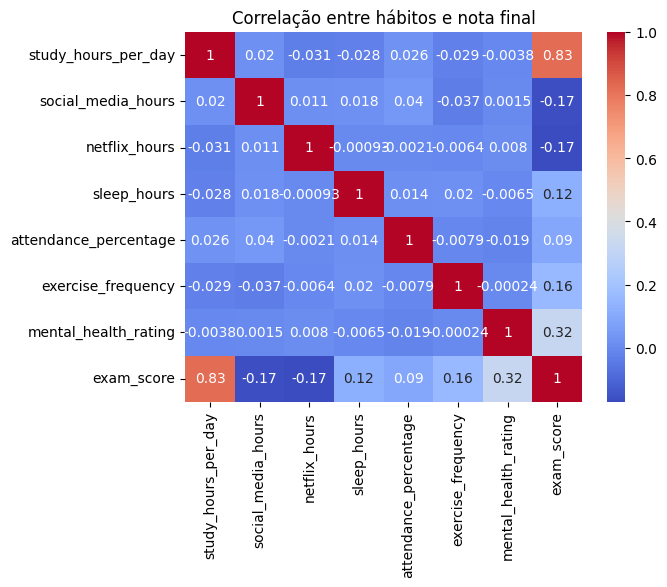

In [17]:
# Colunas numéricas
cols = [
    "study_hours_per_day",
    "social_media_hours",
    "netflix_hours",
    "sleep_hours",
    "attendance_percentage",
    "exercise_frequency",
    "mental_health_rating",
    "exam_score",
]

# Plotar mapa de calor (heatmap)

sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlação entre hábitos e nota final")
plt.show()

 * ### _Alunos que estudam mais têm melhor desempenho?_

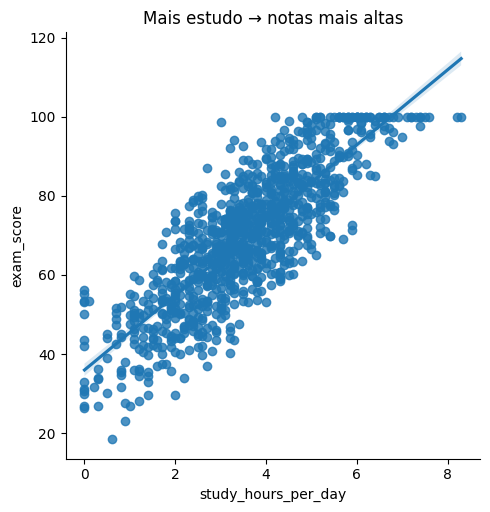

In [18]:
sns.lmplot(data=df, x="study_hours_per_day", y="exam_score")
plt.title("Mais estudo → notas mais altas")
plt.show()

In [19]:
# Comparando médias: quem estuda> 5h x 2h
filtro_estudo_alto = df["study_hours_per_day"] > 5
filtro_estudo_baixo = df["study_hours_per_day"] < 2

grupo_estudo_alto = df[filtro_estudo_alto]["exam_score"]
grupo_estudo_baixo = df[filtro_estudo_baixo]["exam_score"]

print("Média de notas para quem estuda > 5h:", grupo_estudo_alto.mean())
print("Média de notas para quem estuda < 2h:", grupo_estudo_baixo.mean())

Média de notas para quem estuda > 5h: 90.79419354838709
Média de notas para quem estuda < 2h: 45.56390977443609


 * ### _O tempo gasto em redes sociais afeta o desempenho dos alunos?_

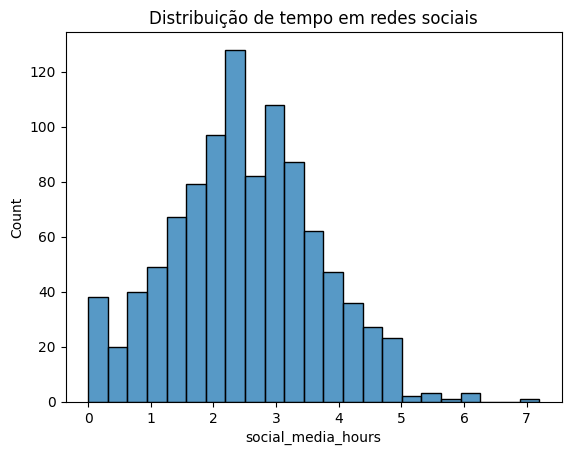

In [20]:
# distribuição geral (histograma)
sns.histplot(data=df, x="social_media_hours")
plt.title("Distribuição de tempo em redes sociais")
plt.show()

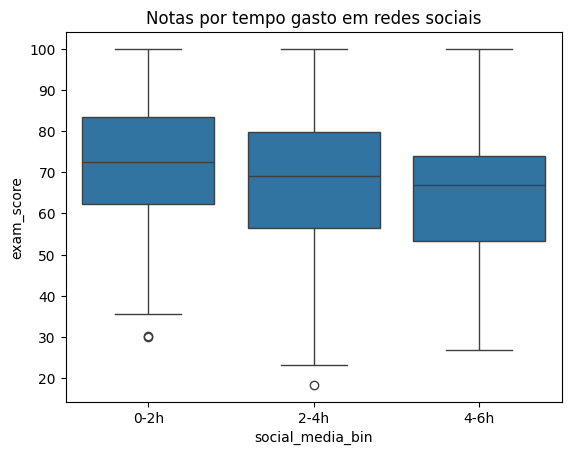

In [21]:
# Avaliando notas médias
# por diferentes intervalos (bins) de períodos gastos em redes sociais
df["social_media_bin"] = pd.cut(
    df["social_media_hours"],
    bins=[0, 2, 4, 6],
    labels=["0-2h", "2-4h", "4-6h"]
)
#Plotar gráfico de caixa (boxplot)
sns.boxplot(x="social_media_bin", y="exam_score", data=df)
plt.title("Notas por tempo gasto em redes sociais")
plt.show()

 * ### _Alunos mais saudáveis têm melhor desempenho?_


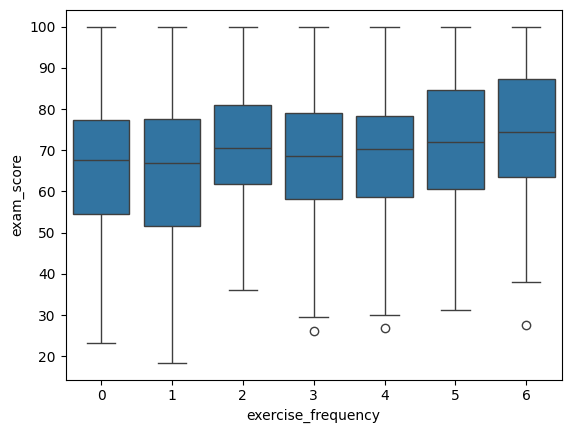

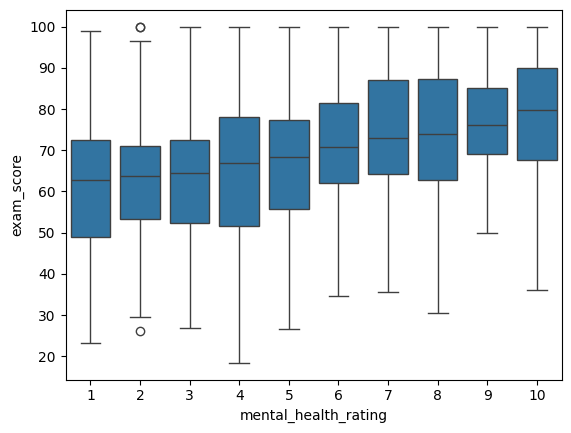

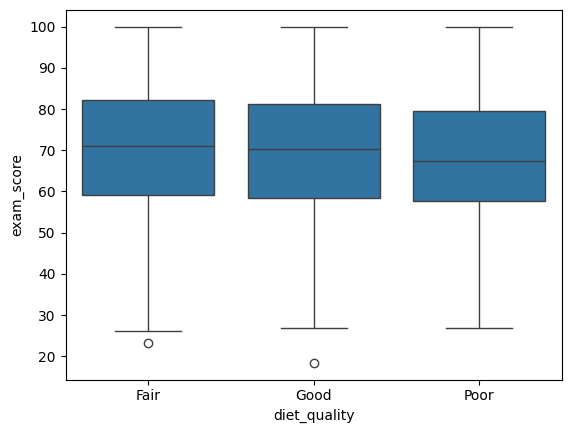

In [22]:
for col in ["exercise_frequency", "mental_health_rating", "diet_quality"]:
    sns.boxplot(x=col, y="exam_score", data=df)
    plt.show()

 * ### _Há diferença nas notas entre mulheres e homens?_


In [23]:
# Estatísticas por gênero (média e desvio padrão)
df.groupby(["gender"])["exam_score"].agg(["mean", "std"])

,mean,std
gender,,
Female,69.741372,16.899351
Male,69.368344,17.150875
Other,70.647619,13.755890


In [24]:
# Avaliar distribuição de gênero
df["gender"].value_counts(normalize=True)

gender
Female    0.481
Male      0.477
Other     0.042
Name: proportion, dtype: float64